In [1]:
import seaborn as sns
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import linear_model
%matplotlib inline
sns.set()

In [2]:
data_sample = pd.read_csv('DataSample__201709211530.csv').drop(['_id','owner','source','createdAt','updatedAt'],axis=1)
data_workout = pd.read_csv('DataWorkoutRun__201709211532.csv')

In [3]:
x1 = data_sample.type
x2 = data_sample.value

types = ['health-bmi','health-body-fat','health-heart-rate','health-sleep','health-weight']
type(x1)

pandas.core.series.Series

In [4]:
def consolidate(type):
    count = 0
    ret = []
    for i in x1:
        if i == type:
            ret.append(float(x2[count]))
        count = count + 1
    return ret


In [5]:
bmi = consolidate('health-bmi')
bodyfat = consolidate('health-body-fat')
weight = consolidate('health-weight')
sleep = consolidate('health-sleep')
heart = consolidate('health-heart-rate')
print len(bmi), len(bodyfat), len(weight), len(sleep), len(heart)

397 368 422 466 7000


In [6]:
bmi

[26.7386817932,
 26.5866241455,
 26.7097015381,
 26.5576438904,
 26.5200080872,
 26.6652870178,
 26.425157547,
 27.069896698,
 27.0683917999,
 26.9505844116,
 27.1643676758,
 27.1621074677,
 27.3743858337,
 26.9791870117,
 26.9573574066,
 26.9991359711,
 26.8504676819,
 27.5588092804,
 26.9005241394,
 26.739812851,
 26.6265220642,
 26.4582805634,
 26.7477149963,
 26.603187561,
 26.4955425262,
 26.5448455811,
 26.6686763763,
 26.5599021912,
 26.3566570282,
 26.7507266998,
 26.2697162628,
 26.5282859802,
 26.7782020569,
 26.5790977478,
 26.6404476166,
 26.634803772,
 26.49177742,
 26.7981510162,
 26.6728172302,
 26.8354110718,
 26.8508434296,
 26.7356719971,
 26.5516223907,
 26.5561408997,
 26.6370601654,
 26.6829795837,
 26.6295337677,
 26.7240047455,
 26.8030433655,
 26.7755680084,
 26.8553600311,
 26.8877277374,
 26.9660148621,
 27.1590976715,
 27.1312465668,
 27.17603302,
 26.9532203674,
 27.2592144012,
 27.2629776001,
 27.2588367462,
 27.2166824341,
 27.2298545837,
 27.0619907379,
 

In [7]:
while len(bmi) != 422:
    bmi.append(0)
while len(bodyfat) != 422:
    bodyfat.append(0)

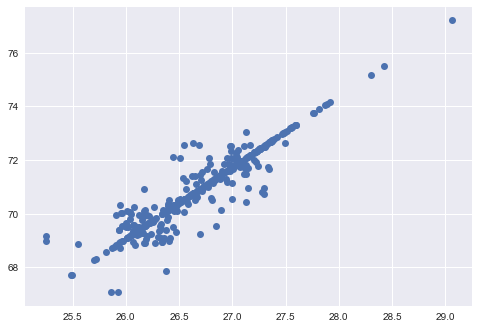

In [8]:
_ = plt.plot(bmi[:397], weight[:397], "o")

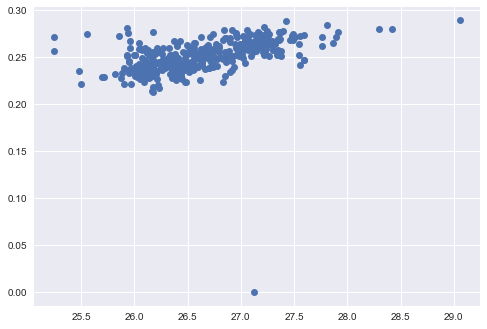

In [9]:
_ = plt.plot(bmi[:368], bodyfat[:368], "o",linewidth=2.0)

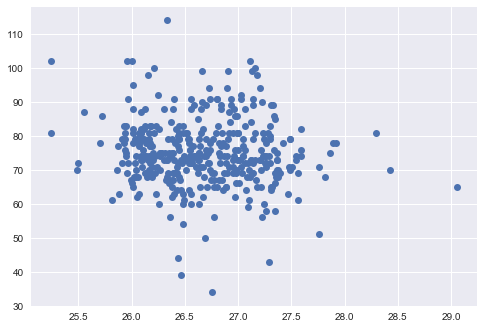

In [10]:
_ = plt.plot(bmi[:397], heart[:397], "o")

In [11]:
bmi = data_sample[data_sample['type'] == 'health-bmi']
bodyfat = data_sample[data_sample['type'] == 'health-body-fat']
next1 = bmi.append(bodyfat)
next1.index = next1['startDate']
next1.loc[:,['type','value']]

,type,value
startDate,,
2014-08-27 21:41:23,health-bmi,26.7386817932
2014-08-28 06:24:53,health-bmi,26.5866241455
2014-08-28 23:46:27,health-bmi,26.7097015381
2014-08-29 06:45:05,health-bmi,26.5576438904
2014-08-29 08:15:49,health-bmi,26.5200080872
2014-08-29 21:40:15,health-bmi,26.6652870178
2014-08-30 07:33:47,health-bmi,26.425157547
2014-08-31 03:03:05,health-bmi,27.069896698
2014-08-31 03:03:45,health-bmi,27.0683917999


In [12]:

data_sample['startDate'] = pd.to_datetime(data_sample['startDate'])

bmi = data_sample[data_sample['type'] == 'health-bmi']
bodyfat = data_sample[data_sample['type'] == 'health-body-fat']


bmi.index = bmi['startDate']
bodyfat.index = bodyfat['startDate']


bmi['value'] = pd.to_numeric(bmi['value'])
bmi = bmi.loc[:,'value']
bmi = bmi.resample('W').mean()


bodyfat['value'] = pd.to_numeric(bodyfat['value'])
bodyfat = bodyfat.loc[:,'value']
bodyfat = bodyfat.resample('W').mean()

bmi = bmi.to_frame('bmi')
bmi['bodyfat'] = bodyfat

/Users/Luqmaan/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/Users/Luqmaan/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [13]:
x = np.asarray([float(bmi['bmi'][i]) for i in range(len(bmi['bmi']))])
y = np.asarray([float(bmi['bodyfat'][i]) for i in range(len(bmi['bodyfat']))])

In [14]:
corr = bmi['bmi'].corr(bmi['bodyfat'], method='spearman')
corr

0.83810402491062164

In [ ]:
def bf(t1, t2): 
    data_sample['startDate'] = pd.to_datetime(data_sample['startDate'])

    a = data_sample[data_sample['type'] == t1]
    b = data_sample[data_sample['type'] == t2]


    a.index = a['startDate']
    b.index = b['startDate']


    a['value'] = pd.to_numeric(a['value'])
    a = a.loc[:, 'value']
    a = a.resample('W').mean()


    b['value'] = pd.to_numeric(b['value'])
    b = b.loc[:, 'value']
    b = b.resample('W').mean()

    a = a.to_frame(t1)
    a[t2] = b

    x = np.asarray([float(a[t1][i]) for i in range(len(a[t1]))])
    y = np.asarray([float(a[t2][i]) for i in range(len(a[t2]))])

    corr = a[t1].corr(a[t2], method='spearman')

    a = a.dropna()
    x = a.bmi.values
    y = a.bodyfat.values
    x = x.reshape(len(x), 1)
    y = y.reshape(len(x), 1)

    regr = linear_model.LinearRegression()
    regr.fit(x, y)

    # plot it as in the example at http://scikit-learn.org/
    plt.scatter(x, y,  color='black')
    plt.plot(x, regr.predict(x), color='blue', linewidth=3)

In [ ]:
bf('health-bmi', 'health-steps')